***
# Getting Data
***
***

In [14]:
import csv
import os
import statistics

pathName = "./RawData/DAQ"
directory = os.fsencode(pathName)

DAQfiles = {}

locations = [0, 50, 100, 150, 200, 300, 400, 500, 750, 1000, 1500]

for file in os.listdir(directory):
    data = {'Time':[], 'Latitude':[],'Longitude':[],'Temperature':[],'Pressure':[],'Windspeed':[]}
    filename = os.fsdecode(file)
    if filename.endswith(".CSV"): 
        print("----", pathName + "/" + filename)
        datafile = open(pathName + "/" + filename, 'r')
        datareader = csv.reader(datafile, delimiter=',')
        for row in datareader:
            if row[0] == "Time":
                continue
            data['Time'].append(row[0])
            data['Latitude'].append(float(row[1][:-1]))
            data['Longitude'].append(float(row[2][:-1]))
            data['Temperature'].append(float(row[3]))
            data['Pressure'].append(float(row[4]))
            data['Windspeed'].append(float(row[5]))
        DAQfiles[filename] = data
        datafile.close()
    else:
        continue

---- ./RawData/DAQ/DAQ0-0A.CSV
---- ./RawData/DAQ/DAQ0-0B.CSV
---- ./RawData/DAQ/DAQ0-0C.CSV
---- ./RawData/DAQ/DAQ09-1300.CSV
---- ./RawData/DAQ/DAQ1-100.CSV
---- ./RawData/DAQ/DAQ1-150.CSV
---- ./RawData/DAQ/DAQ1-50.CSV
---- ./RawData/DAQ/DAQ10-1600A.CSV
---- ./RawData/DAQ/DAQ10-1600B.CSV
---- ./RawData/DAQ/DAQ10-1600C.CSV
---- ./RawData/DAQ/DAQ2-200.CSV
---- ./RawData/DAQ/DAQ2-250.CSV
---- ./RawData/DAQ/DAQ2-300.CSV
---- ./RawData/DAQ/DAQ3-350.CSV
---- ./RawData/DAQ/DAQ3-400.CSV
---- ./RawData/DAQ/DAQ3-450.CSV
---- ./RawData/DAQ/DAQ4-500.CSV
---- ./RawData/DAQ/DAQ4-550.CSV
---- ./RawData/DAQ/DAQ4-600.CSV
---- ./RawData/DAQ/DAQ5-650.CSV
---- ./RawData/DAQ/DAQ5-700.CSV
---- ./RawData/DAQ/DAQ5-750.CSV
---- ./RawData/DAQ/DAQ6-800.CSV
---- ./RawData/DAQ/DAQ6-850.CSV
---- ./RawData/DAQ/DAQ6-900.CSV
---- ./RawData/DAQ/DAQ7-1000.CSV
---- ./RawData/DAQ/DAQ7-1050.CSV
---- ./RawData/DAQ/DAQ7-950.CSV
---- ./RawData/DAQ/DAQ8-1100.CSV
---- ./RawData/DAQ/DAQ8-1150.CSV
---- ./RawData/DAQ/DAQ8-1200.

***
# Averaging for each location
***

In [36]:
import statistics as stat
AveragedData = {'Temperature':[],'Pressure':[]}
index = 0
for file in DAQfiles:
    for key in AveragedData:
        data = DAQfiles[file][key]
        ave = stat.mean(data)
        if (ave == 0):
            AveragedData[key].append(AveragedData[key][index-1])
            continue
        AveragedData[key].append(ave)
        prev = ave
    index += 1

***
# Graphing
***

[0, 0, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1600, 1600, 1600]


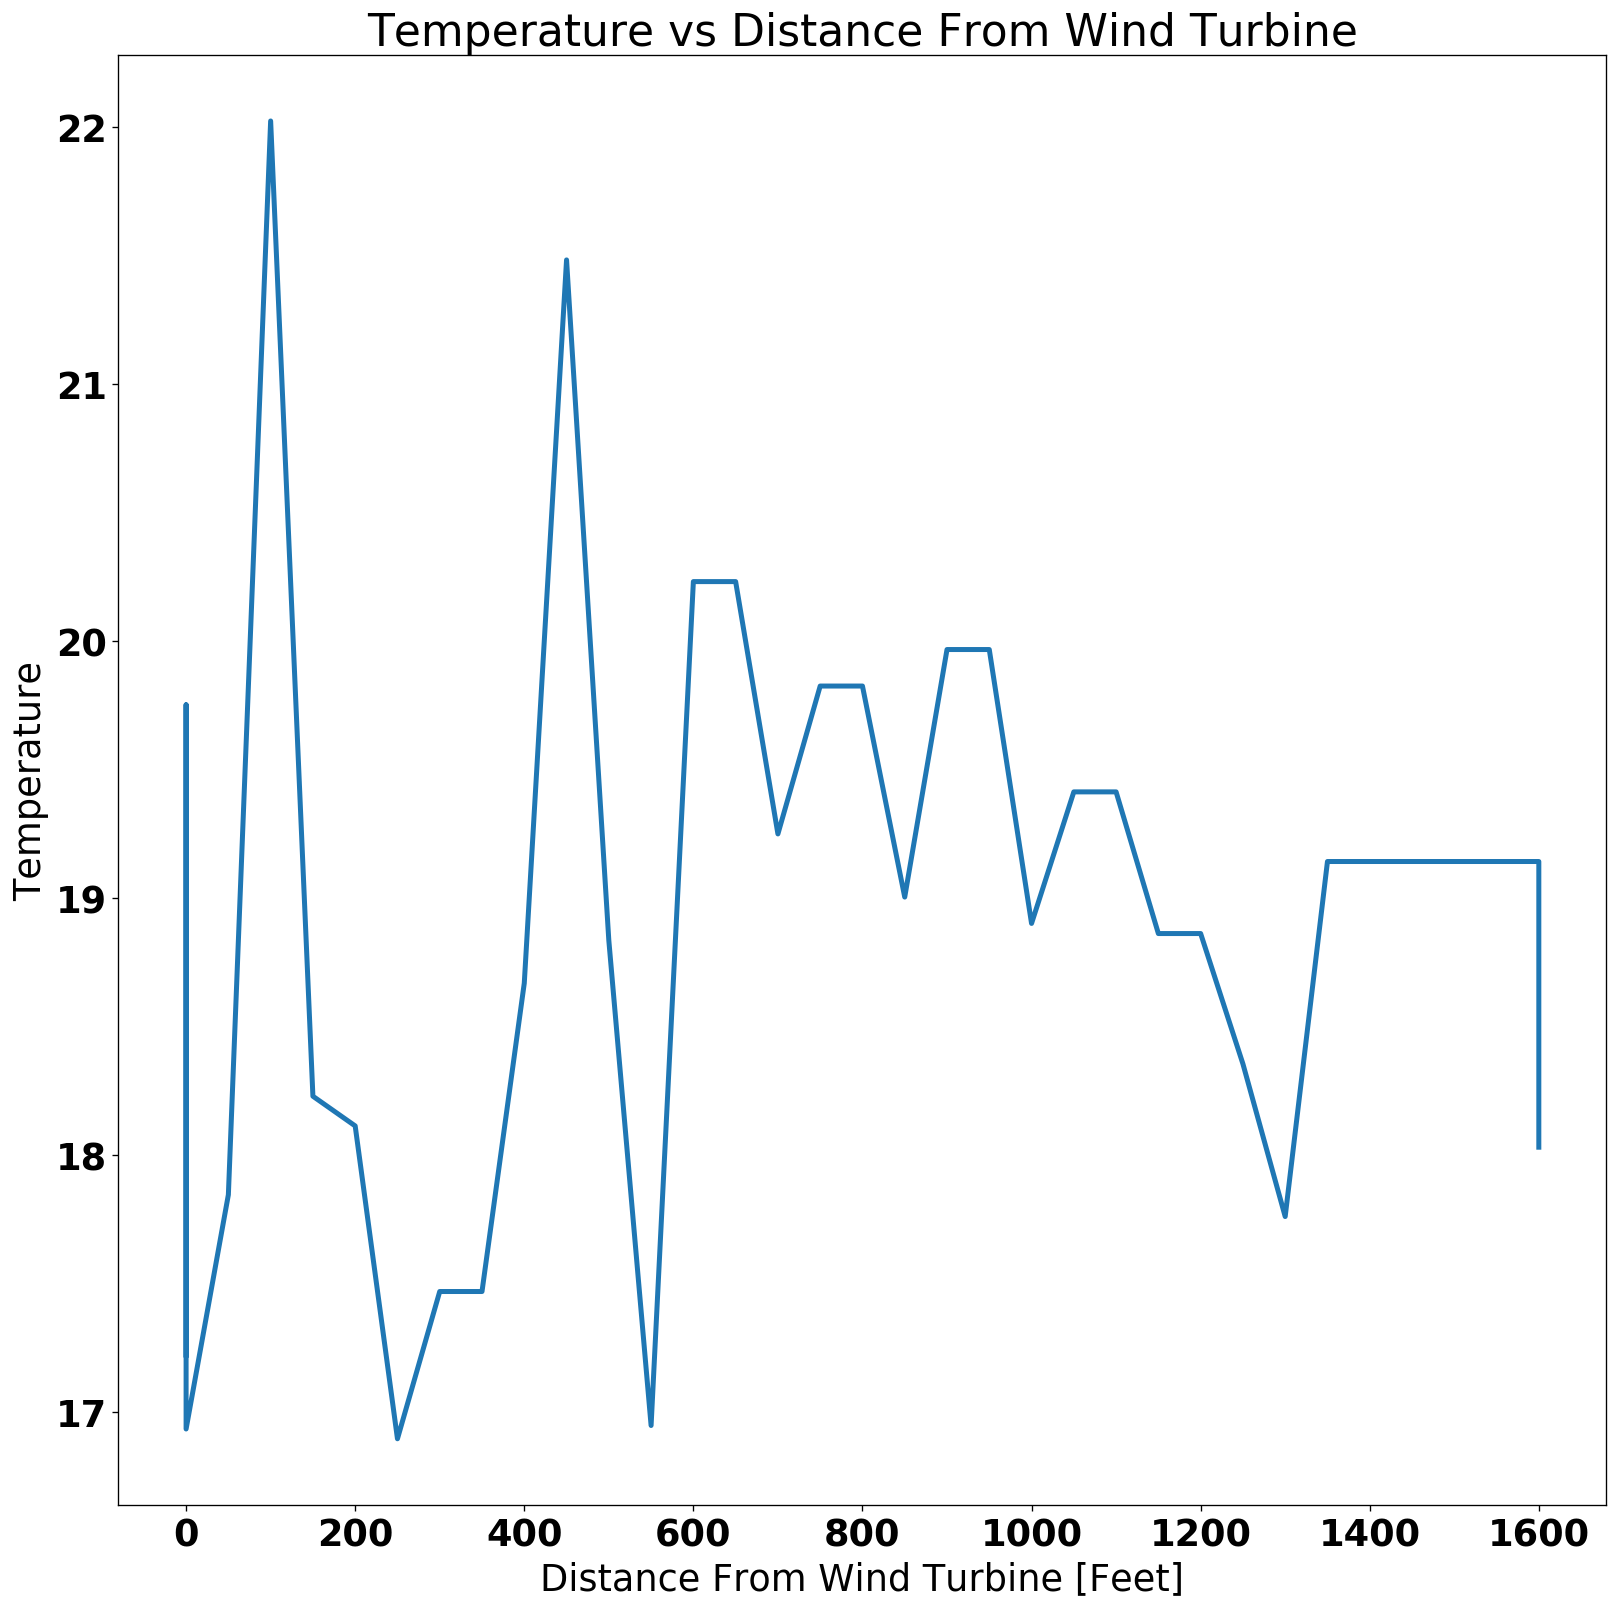

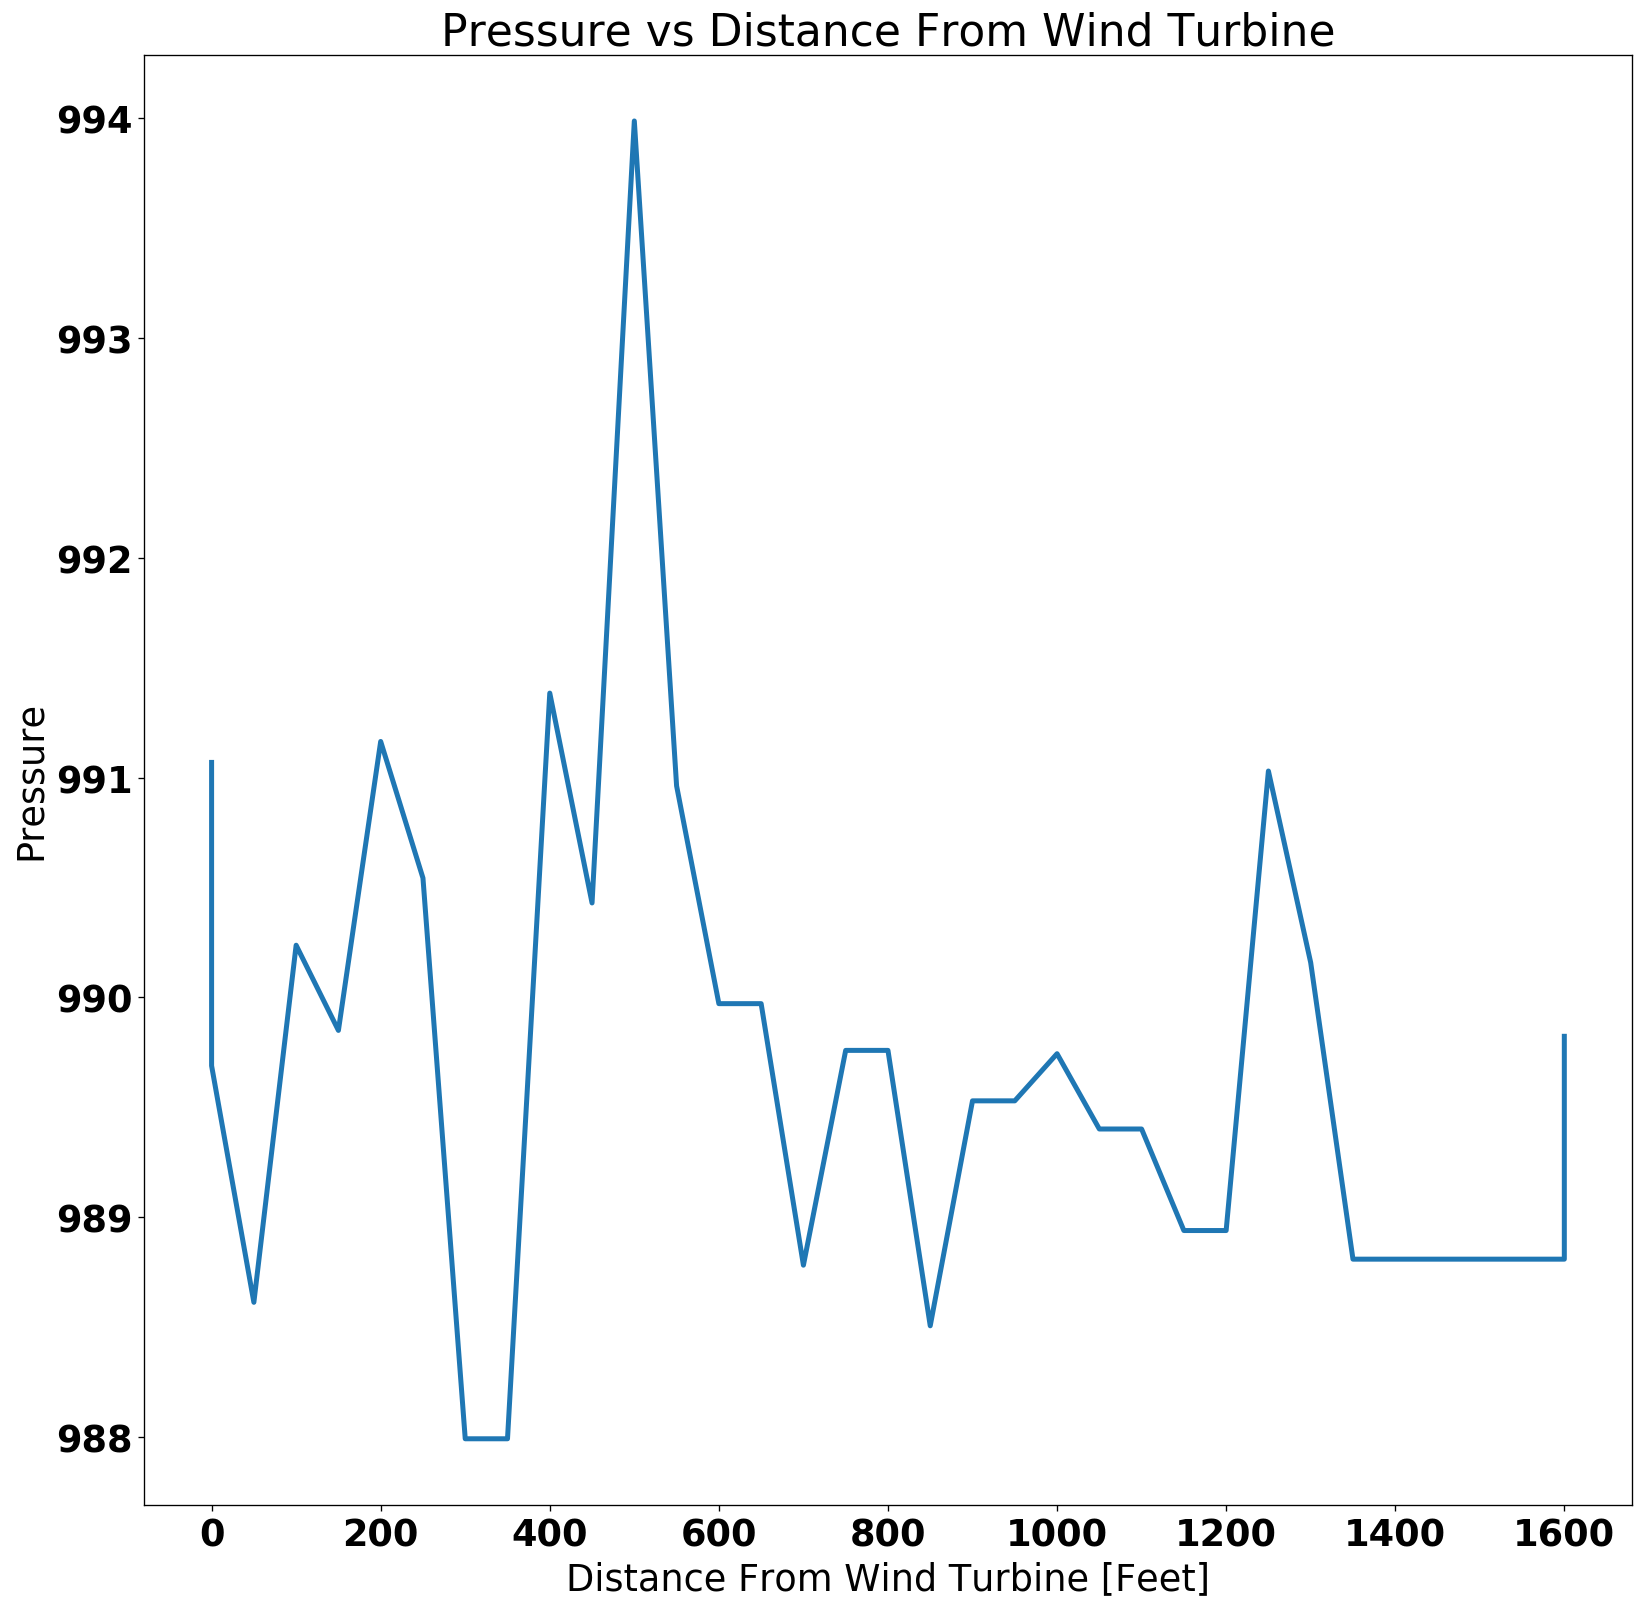

In [37]:
%run HelperFunctions.ipynb

x = [0,0,0]
x.extend(range(50,1400,50))
x.extend([1600,1600,1600])
print(x)

ys = []

for attribute in AveragedData:
    y = AveragedData[attribute]
    if (y == 0.0):
        continue
    title = attribute + " vs Distance From Wind Turbine"
    saveTo = "DAQGraphs/" + title
    plotGraph(x, y, ylabel = attribute, xlabel = "Distance From Wind Turbine [Feet]",
             title = title, saveTo = saveTo)

In [3]:
import math
def toMeters(lat1, lon1, lat2, lon2):
    l1 = (lat2-lat1)*111.32
    l2 = (lon2-lon1)*40075*math.cos(lat1) / 360
    return (math.sqrt(l1*l1 + l2*l2)*100) #meters

# toMeters(8000,6000,8000.0001,6000.0000)

In [4]:
import matplotlib.pyplot as plt
import statistics as stat

ys = []
y = []
x = []
# center = files[0]['Latitude']
for file in DAQfiles:
    pos = stat.mean(DAQfiles[file]['Latitude'])
    x.append(pos)
x.sort()
for lat in x:
    for file in DAQfiles:
        if (stat.mean(DAQfiles[file]['Latitude']) == lat):
            print(lat, file)
# x2 = []
# for lat in x:
# #     distance
#     x2.append(toMeters(lat, stat.mean(files[lat]['Longitude']), x[0], stat.mean(files[x[0]]['Longitude'])))
#     y.append(stat.mean(files[lat]['Temperature']))

# print(x2)
# plt.plot(x2,y)
# plt.show()
# ys.append(y)
# plotGraph(ys, "","","","")

4012.2205 DAQ00.CSV
4012.2297 DAQ01.CSV
4012.2373 DAQ02.CSV
4012.2454 DAQ03.CSV
4012.2539 DAQ04.CSV
4012.27 DAQ05.CSV
4012.28711119403 DAQ06.CSV
4012.3042 DAQ07.CSV
4012.3486 DAQ08.CSV
4012.389907633588 DAQ09.CSV
4012.4819 DAQ10.CSV


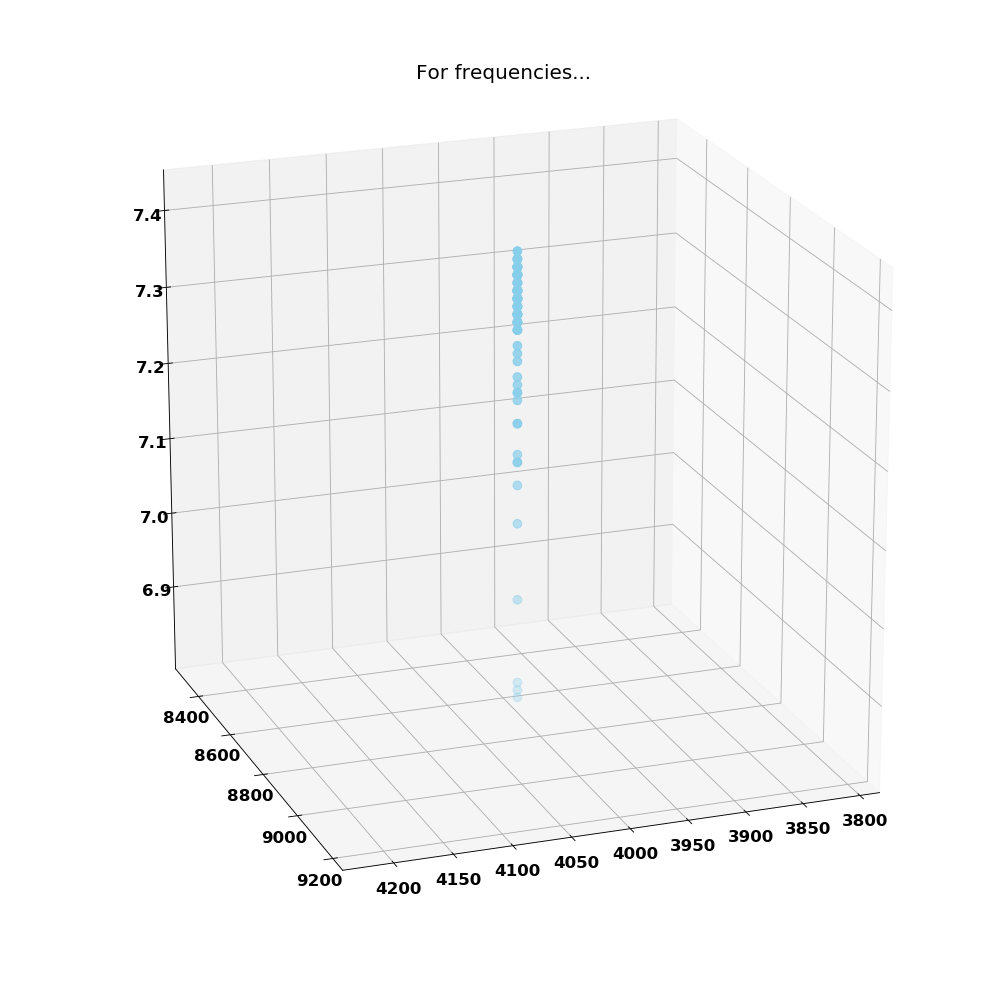

In [5]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
 
# Dataset
x = []
y = []
z = []
for i in range(-50,50):
    for j in range(-50,50):
        x.append(i)
        y.append(j)
        z.append(math.exp(-i*i/300-j*j/300) + 100)

# plot
fig=plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
ax = fig.add_subplot(111, projection='3d')
plt.title("For frequencies...")
x = data['Latitude']
y = data['Longitude']
z = data['Temperature']
ax.scatter(x,y,z, c='skyblue', s=60)
ax.view_init(20, 70)
plt.show()


In [6]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
 
mMap = []
for latitude in data['Latitude']:
    line = []
    for longitude in data['Longitude']:
        line.append(data['Temperature'])
    
df = pd.DataFrame(,z)
# plot using a color palette
sns.heatmap(df, cmap="YlGnBu")
sns.pyplot.show()

SyntaxError: invalid syntax (<ipython-input-6-3e09e26057d9>, line 12)

In [ ]:
def measure(lat1, lon1, lat2, lon2):  #// generally used geo measurement function
    R = 6378.137 # // Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180 
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) *math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d * 1000 #// meters

In [ ]:
measure(8000,6000,8000.0001,6000.0000)